In [7]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The model slug is the most recently created folder in ./models/logs

TRAINED_PATH = "./models/trained"

MODEL_SLUG = sorted(os.listdir(TRAINED_PATH))[-1]
print(f"Using model {MODEL_SLUG}")

actions = pd.read_csv(f"{TRAINED_PATH}/{MODEL_SLUG}/logs/actions.csv")

plt.rcParams['figure.figsize'] = [15, 5]

plt.close()

Using model ADDQN-400m-testCourse-09-12-2023_17:26


In [8]:
# COLUMNS
# -------
# power_max_w,velocity,gradient,percent_complete,AWC,ghost_percent_complete,position,action,power_agent_w,reward,episode,ghost_action,step,total_reward

# Get all the episodes where the last step in the episode is less than 62
terminal = actions.groupby("episode").last()

winning_episodes = terminal[
    (terminal["step"] <= 66) &
    ( terminal['percent_complete'] == 1.0)
    ]

print(f"Found {len(winning_episodes)} winning episodes")

# Get these episodes from the actions dataframe
winning_runs = actions[actions["episode"].isin(winning_episodes.index)]

Found 1 winning episodes


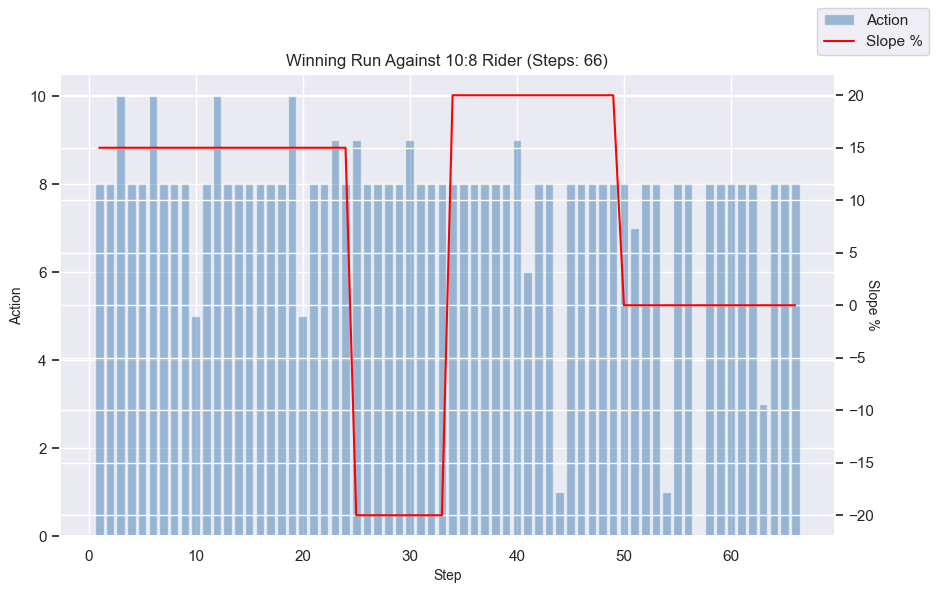

In [9]:
# Get the winning run with the least number of steps
winning_run = winning_runs[winning_runs["episode"] == winning_episodes["step"].idxmin()].copy()
# Derive the elevation column
winning_run['elevation'] = (winning_run['gradient'] * winning_run['step']).cumsum()

# Set the style to a seaborn theme
sns.set_theme()

# Create a new figure with a specified size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first bar chart (action vs. step) with blue color and 50% opacity
ax1.bar(winning_run["step"], winning_run["action"], color='steelblue', alpha=0.5, label='Action')
ax1.set_ylabel('Action', fontsize=10)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Overlay the elevation on the bar chart using a line plot
ax2.plot(winning_run["step"], winning_run["gradient"], color='red', label='Slope %')
ax2.set_ylabel('Slope %', fontsize=10, rotation=270,)

# Add labels and title
ax1.set_xlabel('Step', fontsize=10)
# Show the number of steps in the title
plt.title(f'Winning Run Against 10:8 Rider (Steps: {len(winning_run)})', fontsize=12)

# Add a legend to distinguish the bars
fig.legend(loc="upper right")

# Show the plot
plt.show()